In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


In [2]:
# Carregar e preprocessar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os valores dos pixels para [0, 1] e adicionar canal para imagens em escala de cinza
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Converter os rótulos em one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Criar o modelo com camadas convolucionais
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name="Conv1"),
    MaxPooling2D((2, 2), name="Pool1"),
    Conv2D(64, (3, 3), activation='relu', name="Conv2"),
    MaxPooling2D((2, 2), name="Pool2"),
    Flatten(name="Flatten"),
    Dense(128, activation='relu', name="Dense1"),
    Dense(10, activation='softmax', name="Output")
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

d:\Monte Carlo Digital\Projeto MNIST\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Treinar o modelo
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8684 - loss: 0.4305 - val_accuracy: 0.9747 - val_loss: 0.0843
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9814 - loss: 0.0630 - val_accuracy: 0.9840 - val_loss: 0.0512
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9868 - val_loss: 0.0448
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.9861 - val_loss: 0.0473
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9898 - val_loss: 0.0369


In [5]:
# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9859 - loss: 0.0413
Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

d:\Monte Carlo Digital\Projeto MNIST\.env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


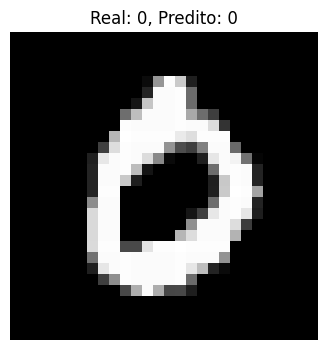

In [6]:
# Forçar a inicialização do modelo com uma entrada de exemplo
_ = model(np.zeros((1, 28, 28, 1)))

# Criar um modelo para visualizar os mapas de ativação
saidas_seq = [layer.output for layer in model.layers]  # Pegando todas as saídas das camadas
visualizacao_model = tf.keras.models.Model(inputs=model.inputs, outputs=saidas_seq)

# Selecionar uma imagem de teste
indice_img_teste = 3
img_teste = x_test[indice_img_teste:indice_img_teste + 1]

# Predição
mapas_sequenciais = visualizacao_model.predict(img_teste)

# Predizer o rótulo usando o modelo principal
predicao = model.predict(img_teste)
label_real = np.argmax(y_test[indice_img_teste])  # Rótulo real
label_predito = np.argmax(predicao[0])  # Rótulo predito

# Visualizar a imagem original com os rótulos
plt.figure(figsize=(4, 4))
plt.title(f"Real: {label_real}, Predito: {label_predito}")
plt.imshow(img_teste[0].squeeze(), cmap='gray')
plt.axis('off')  # Ocultar os eixos
plt.show()

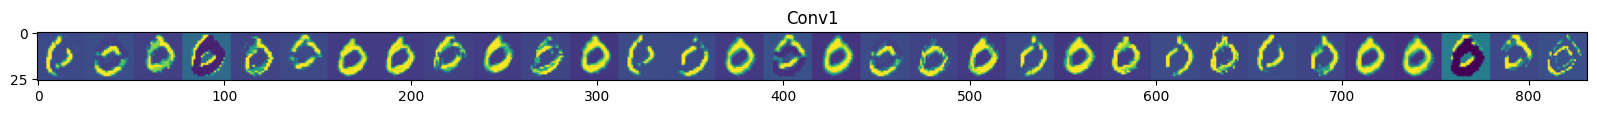

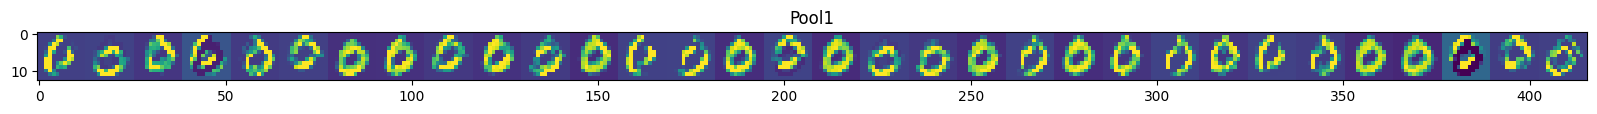

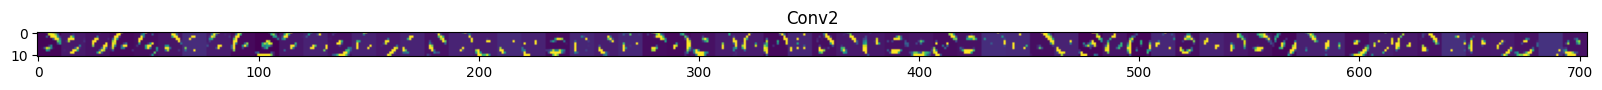

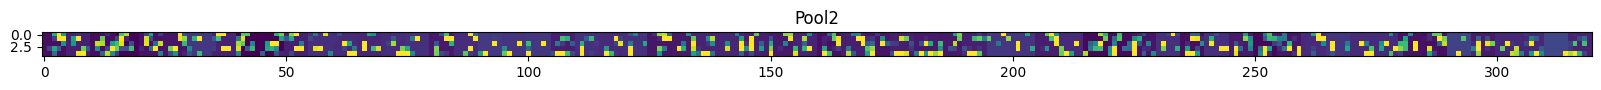

In [7]:
# Definir os nomes das camadas antes do loop
layer_nomes = [layer.name for layer in model.layers]

# Visualizar os mapas de ativação
for layer_name, feature_map in zip(layer_nomes, mapas_sequenciais):
    if len(feature_map.shape) == 4:  # Verificar se é uma camada convolucional
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= (x.std() + 1e-5)  # Evitar divisão por zero
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Preencher o grid horizontal
            display_grid[:, i * size: (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [8]:
# Imprimir a arquitetura do modelo e o número de parâmetros
print("Arquitetura do modelo:")
model.summary()

Arquitetura do modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [9]:
# Acessar a primeira camada convolucional
primeira_camada = model.get_layer("Conv1")

# Obter os pesos (kernels) e biases da camada
kernels, biases = primeira_camada.get_weights()

# Os kernels têm a forma (tamanho do filtro, tamanho do filtro, canais de entrada, número de filtros)
print(f"Forma dos filtros: {kernels.shape}")

print(f"\nFiltro {0}:")
print(kernels[:, :, :, 0])  # Os valores do filtro

Forma dos filtros: (3, 3, 1, 32)

Filtro 0:
[[[-0.2715642 ]
  [ 0.00604302]
  [ 0.19052187]]

 [[-0.22508417]
  [-0.06131671]
  [ 0.21607175]]

 [[ 0.07120544]
  [-0.14842558]
  [ 0.18373068]]]


In [11]:
# Salvar o modelo no formato HDF5
model.save('modelo_mnist.h5')